# Vorhersage

## Vorbereitung

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("MdB_Indexed.csv")
df = df.set_index("WP-JAHRE")
df.head()

,NUMIND,ID,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,AUSLAND,MANDATSART,WP1,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1949-1953;01,0,11000009,1949,73,1,Union,Bundeskanzler a. D.,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1,11000013,1949,45,1,Andere,"Bergmann, Gewerkschaftsfunktionär",0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,2,11000015,1949,70,1,Andere,Kapitän a. D.,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,3,11000020,1949,59,1,Union,Geschäftsführer,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,4,11000021,1949,48,0,SPD,Buchhalterin,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
IDs = df[["ID", "ANFANG"]].copy()
df = df.drop(["ID", "NUMIND", "BERUF"], axis = 1)

#für etwaige Visualisierungen von Zeitreihen
timeline= df["ANFANG"].unique()
print(timeline)

df.head()

[1949 1953 1957 1961 1965 1969 1972 1976 1980 1983 1987 1990 1994 1998
 2002 2005 2009 2013 2017]


,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1949-1953;01,1949,73,1,Union,0,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,45,1,Andere,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,70,1,Andere,0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,59,1,Union,0,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1949-1953;01,1949,48,0,SPD,0,0.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
uniq = list(df.index.unique())

#Einzelne DFs
df_WP01 = df.loc[uniq[0]]
df_WP02 = df.loc[uniq[1]]
df_WP03 = df.loc[uniq[2]]
df_WP04 = df.loc[uniq[3]]
df_WP05 = df.loc[uniq[4]]
df_WP06 = df.loc[uniq[5]]
df_WP07 = df.loc[uniq[6]]
df_WP08 = df.loc[uniq[7]]
df_WP09 = df.loc[uniq[8]]
df_WP10 = df.loc[uniq[9]]
df_WP11 = df.loc[uniq[10]]
df_WP12 = df.loc[uniq[11]]
df_WP13 = df.loc[uniq[12]]
df_WP14 = df.loc[uniq[13]]
df_WP15 = df.loc[uniq[14]]
df_WP16 = df.loc[uniq[15]]
df_WP17 = df.loc[uniq[16]]
df_WP18 = df.loc[uniq[17]]
df_WP19 = df.loc[uniq[18]]


df_wp_list = [df_WP01, df_WP02, df_WP03, df_WP04, df_WP05, df_WP06, df_WP07, df_WP08, df_WP09, df_WP10, df_WP11, df_WP12, df_WP13,
df_WP14,df_WP15,df_WP16,df_WP17,df_WP18, df_WP19]


#Test
df_wp_list[4].head()

,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1965–1969;05,1965,35,1,Union,0,1.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1965–1969;05,1965,56,1,FDP,0,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,46,1,SPD,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,89,1,Union,0,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1965–1969;05,1965,45,1,Union,0,1.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Transformieren der Spalte für Parteikürzel in einzelne, binäre Spalten

def binary_transformer(dafr):
    uni_lst = list(dafr["PARTEI_KURZ"].unique())
    for e in uni_lst:
        dafr[e]= dafr["PARTEI_KURZ"] == e
        dafr[e].replace([True, False], [1,0], inplace = True)
        

for e in df_wp_list:
    binary_transformer(e)
    
#test
df_wp_list[9].head()

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,...,WP14,WP15,WP16,WP17,WP18,WP19,Union,SPD,Bündnis 90/Die Grünen,FDP
WP-JAHRE,,,,,,,,,,,,,,,,,,,,,
1983–1987;10,1983,53,1,Union,0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1983–1987;10,1983,59,1,SPD,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1983–1987;10,1983,55,1,Union,0,1.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1983–1987;10,1983,49,1,SPD,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1983–1987;10,1983,44,1,SPD,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#Ausschließen von Spalten mit redundanter Information
#bspw. alle Wahlperioden nach der nächsten, da diese höchst wahrscheinlich nicht relevant sind

wp_list = np.array(["WP1","WP2","WP3","WP4","WP5","WP6","WP7","WP8","WP9","WP10","WP11","WP12","WP13","WP14","WP15","WP16","WP17","WP18","WP19"])	

def del_redun(dafr):
    num = int(dafr.index[0][-2:])
    ind = np.array(range(0,19))
    sel = list(ind[ind>num])
    sel.append(ind[num-1])
    drop_cols = list(wp_list[sel])
    return drop_cols

for d in list(range(0,19)):
    drop = list(del_redun(df_wp_list[d]))
    df_wp_list[d] = df_wp_list[d].drop(drop, axis = 1)

for e in list(range(0,19)):
    drop = ["ANFANG", "PARTEI_KURZ"]
    df_wp_list[e] = df_wp_list[e].drop(drop, axis = 1)
    

df_wp_list[3].head()

,ALTER,GESCHLECHT,AUSLAND,MANDATSART,WP1,WP2,WP3,WP5,FDP,Union,SPD,Andere
WP-JAHRE,,,,,,,,,,,,
1961–1965;04,52,1,0,0.0,0,0,1,1,1,0,0,0
1961–1965;04,48,0,1,0.0,0,1,1,0,0,1,0,0
1961–1965;04,85,1,0,1.0,1,1,1,1,0,1,0,0
1961–1965;04,41,1,0,1.0,0,0,0,1,0,1,0,0
1961–1965;04,37,1,0,1.0,0,0,1,1,0,1,0,0


In [7]:
#Z-Transformation des Alters
for d in list(range(0,19)):
     df_wp_list[d]["ALTER"] = (df_wp_list[d]["ALTER"] -  df_wp_list[d]["ALTER"].mean())/df_wp_list[d]["ALTER"].std()

In [8]:
#Umindizieren
for e in df_wp_list:
     e.index = range(len(list(e.index)))

df_wp_list[6].head()

,ALTER,GESCHLECHT,AUSLAND,MANDATSART,WP1,WP2,WP3,WP4,WP5,WP6,WP8,Union,FDP,SPD
0,-0.485003,1,0,1.0,0,0,0,0,1,1,1,1,0,0
1,1.848721,1,0,0.0,0,0,1,1,1,1,0,0,1,0
2,0.737424,1,0,1.0,0,0,0,0,1,1,1,0,0,1
3,0.404034,1,0,1.0,0,0,0,0,0,0,1,0,0,1
4,0.181775,1,0,1.0,0,0,0,0,0,1,1,0,0,1


### Generierung einer Spalte für Erfahrung

## Machine Learning Models

### Importe

In [9]:

from sklearn.cross_validation import cross_val_score



from sklearn.linear_model import LogisticRegression


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


from sklearn import neighbors

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Decision Tree Classifier

In [10]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    dtc = DecisionTreeClassifier()
    scores = cross_val_score(dtc, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[62.67, 3.31]
[60.9, 6.34]
[61.22, 3.25]
[63.44, 2.55]
[62.1, 3.75]
[60.62, 3.16]
[68.12, 1.95]
[63.31, 3.49]
[68.34, 4.47]
[69.1, 1.54]
[63.53, 1.72]
[60.67, 3.83]
[67.24, 2.54]
[63.39, 6.43]
[58.94, 9.08]
[58.55, 6.18]
[67.98, 12.95]
[61.73, 5.52]


#### Logistic Regression

In [11]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    log = LogisticRegression()
    scores = cross_val_score(log, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[72.15, 3.59]
[71.85, 2.33]
[72.77, 2.39]
[74.65, 3.97]
[75.85, 1.68]
[73.75, 2.17]
[75.04, 1.23]
[75.23, 3.42]
[78.33, 1.51]
[78.13, 0.99]
[69.65, 3.4]
[70.11, 3.36]
[75.62, 2.89]
[63.96, 8.08]
[62.45, 9.95]
[62.64, 7.87]
[73.66, 12.17]
[62.51, 8.16]


#### Random Forest Classifier

In [12]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    rfc = RandomForestClassifier()
    scores = cross_val_score(rfc, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[67.72, 3.13]
[63.59, 4.6]
[67.08, 3.54]
[66.37, 2.18]
[65.82, 5.66]
[67.26, 2.82]
[69.76, 3.56]
[67.63, 3.98]
[75.06, 3.63]
[70.84, 1.84]
[66.52, 2.03]
[65.67, 3.48]
[72.0, 3.77]
[62.38, 3.91]
[60.7, 8.8]
[56.09, 7.09]
[70.28, 11.47]
[59.77, 8.16]


#### KNeighbors

In [22]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X,y, cv = 5, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[70.25, 4.94]
[66.99, 5.09]
[68.33, 3.29]
[69.67, 3.91]
[74.42, 1.82]
[72.48, 3.04]
[71.4, 4.05]
[72.32, 2.51]
[77.96, 2.64]
[74.31, 2.77]
[68.8, 4.47]
[65.97, 3.56]
[75.9, 1.56]
[63.39, 4.67]
[61.97, 11.14]
[61.38, 3.93]
[75.18, 9.13]
[66.91, 8.03]


#### GaussianProcessClassifier

In [14]:
for i in list(range(0,18)):
    df = df_wp_list[i]
    wpnum = "WP" + str(int(i+2))
    X, y = df.loc[:, df.columns != wpnum], df[wpnum]
    gpc = GaussianProcessClassifier(random_state=0, kernel= 1.0*RBF(2.0))
    scores = cross_val_score(gpc, X,y, cv = 3, scoring ="accuracy")
    print([round(np.mean(scores)*100, 2), round(np.std(scores)*100,2)])

[71.95, 2.18]
[71.32, 1.62]
[72.78, 0.44]
[75.7, 2.96]
[74.59, 1.44]
[74.64, 2.71]
[75.58, 1.79]
[74.31, 2.41]
[78.15, 1.09]
[78.65, 1.06]
[70.79, 1.13]
[70.39, 2.19]
[77.92, 0.4]
[63.53, 11.45]
[54.31, 13.79]
[58.45, 12.39]
[70.12, 15.11]
[63.54, 7.35]


### Plotting

In [15]:
surv_rate_lst = [] 

for d in list(range(0,18)):
    wpnum = "WP" + str(d+2)
    surv_rate = df_wp_list[d][wpnum].sum() / len(df_wp_list[d])
    surv_rate = round(surv_rate*100, 2)
    surv_rate_lst.append(surv_rate)

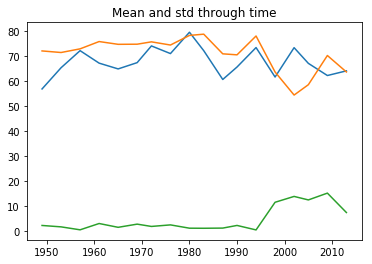

In [16]:
gpc_score_list = [[71.95, 2.18],[71.32, 1.62],[72.78, 0.44],[75.7, 2.96],[74.59, 1.44],[74.64, 2.71],[75.58, 1.79],[74.31, 2.41],
                  [78.15, 1.09],[78.65, 1.06],[70.79, 1.13],[70.39, 2.19],[77.92, 0.4],[63.53, 11.45],[54.31, 13.79],[58.45, 12.39],[70.12, 15.11],[63.54, 7.35]]

means = []
stds = []
for e in gpc_score_list:
    means.append(e[0])
    stds.append(e[1])

#Blau
plt.plot(timeline[:18], surv_rate_lst)
#Orange
plt.plot(timeline[:18], means)
#Grün
plt.plot(timeline[:18], stds)
plt.title('Durchschnitt und Standardabweichung des Modells')
plt.show()

## Unsere Vorhersage

In [49]:
df_wp_list[17] = df_wp_list[17].drop(['WP1', 'WP2',
'WP3', 'WP4', 'WP5', 'WP6', "Andere"], axis = 1)

In [50]:
df_wp_list[18] = df_wp_list[18].drop(['WP1', 'WP2',
'WP3', 'WP4', 'WP5', 'WP6',"WP7", "FDP", "AfD"], axis = 1)

In [53]:
df_wp_list[18] = df_wp_list[18].drop(["FDP", "AfD"], axis = 1)

In [63]:
df_wp_list[18] = df_wp_list[18].rename(columns={"WP8":"WP7", "WP9":"WP8","WP10":"WP9", "WP11":"WP10", "WP12":"WP11", "WP13":"WP12", "WP14":"WP13", "WP15":"WP14", "WP16":"WP15", "WP17":"WP16", "WP18": "WP17"})

In [65]:
col_selection = list(df_wp_list[17].columns.values)
col_selection.remove("WP19")
X_train, y_train, X_test = df_wp_list[17][col_selection], df_wp_list[17]["WP19"], df_wp_list[18]

In [66]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)

In [68]:
sum(y_pred)/len(y_pred)

0.7566807313642757

In [69]:
gpc = gpc = GaussianProcessClassifier(random_state=0, kernel= 1.0*RBF(2.0))
gpc.fit(X_train, y_train)
y_pred2 = gpc.predict(X_test)

In [70]:
sum(y_pred2)/len(y_pred2)

0.7721518987341772